In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [ ]:
import numpy as np
from scipy.stats import norm

num_samples = 5000

signal1 = norm.rvs(loc=0, scale=.5, size=(1, num_samples))[0]
signal2 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]

In [ ]:
df = pd.DataFrame({'x':signal1,'y':signal2})

In [ ]:
df.head()

,x,y
0,-0.265229,1.517411
1,0.511476,-0.699729
2,0.480953,-0.059784
3,-0.303623,0.920202
4,0.048277,-0.500330


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


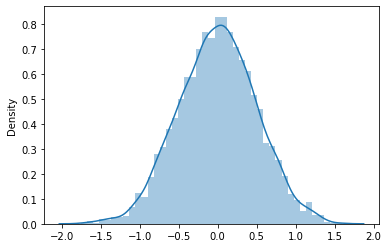

In [ ]:
sns.distplot(signal1, kde= True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


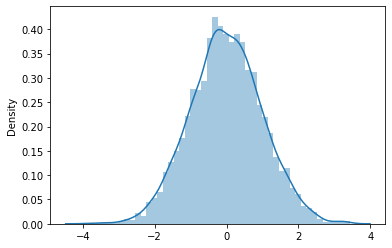

In [ ]:
sns.distplot(signal2,kde= True);

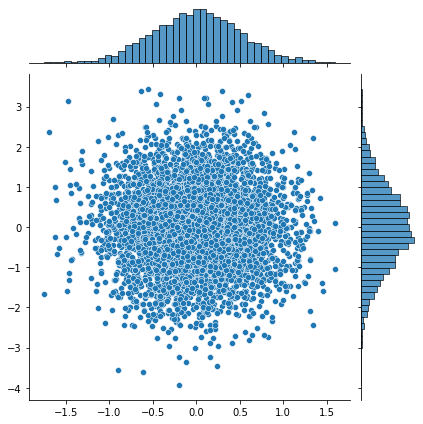

In [ ]:
sns.jointplot(x = signal1,y = signal2,data = df);

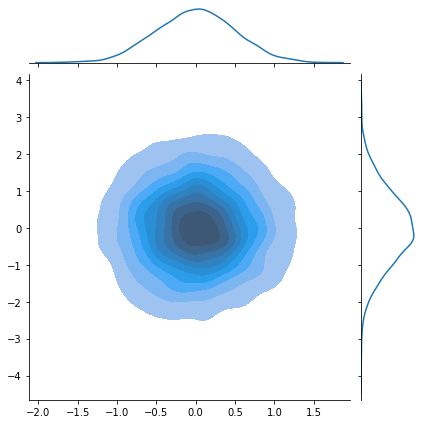

In [ ]:
q = sns.jointplot(x = signal1,y = signal2,data = df,kind = 'kde',shade = True);
q.savefig('bivariate_with_zero_covarience.jpg')

In [ ]:
np.corrcoef(signal1,signal2)

array([[ 1.        , -0.00168923],
       [-0.00168923,  1.        ]])

# sampling by specifying covarience


In [ ]:
num_samples = 5000

signal1 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]
signal2 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]

In [ ]:
# desired std
std1 = 11.2
std2 = 0.5

std_m = np.array([
    [std1, 0],
    [0, std2]
])

# desired correlation
corr_m = np.array([
    [1, .75],
    [.75, 1]
])

# calc desired varience-covarience matrix)
cov_m = np.dot(std_m, np.dot(corr_m, std_m))

In [ ]:
cov_m

array([[125.44,   4.2 ],
       [  4.2 ,   0.25]])

In [ ]:
from scipy.linalg import cholesky
cky = cholesky(cov_m, lower=True)
cky

array([[11.2       ,  0.        ],
       [ 0.375     ,  0.33071891]])

In [ ]:
corr_data = np.dot(cky, [signal1, signal2])
signal_1 = corr_data[0]
signal_2 = corr_data[1]
np.corrcoef(signal_1, signal_2)

array([[1.        , 0.75283503],
       [0.75283503, 1.        ]])

In [ ]:
df_ = pd.DataFrame({'x' : signal_1, 'y': signal_2})

In [ ]:
signal_1

array([-1.22991695,  3.76370193, 11.62617899, ...,  6.57253782,
       -0.04020377, 19.34716516])

In [ ]:
signal_2

array([ 0.58834863, -0.26556575,  0.23391839, ...,  0.11569467,
       -0.17754582,  0.45235592])

In [ ]:
type(signal_1)

numpy.ndarray

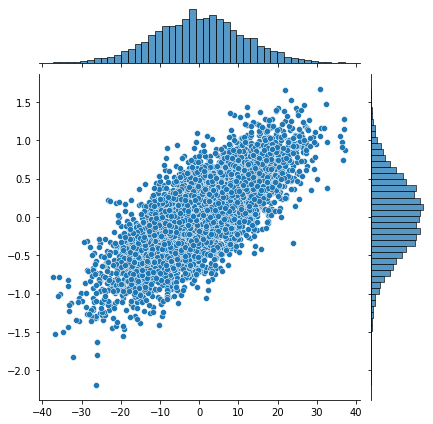

In [ ]:
sns.jointplot(x = signal_1 , y = signal_2 ,data = df_);

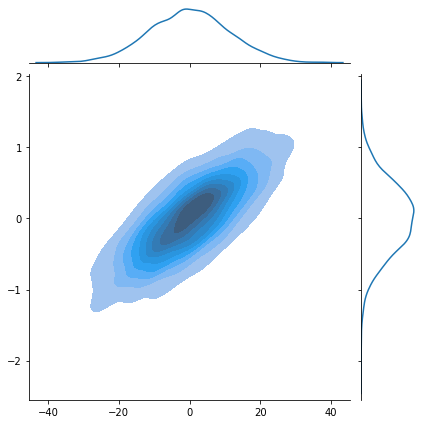

In [ ]:
p = sns.jointplot(x = signal_1 , y = signal_2 ,data = df_ , kind = 'kde',shade = True);
p.savefig('bivariate_with_nonzero_covarience.jpg')